In [131]:
%matplotlib inline
import pytraj as pt
import numpy as np
import matplotlib.pyplot as plt
import parmed as pmd

from matplotlib import rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

Read in the trajectory file (.dcd) and the topology file (.psf)

In [132]:
traj = pt.Trajectory('step5_production.dcd', '../step3_pbcsetup.xplor.ext.psf')
print(traj)

pytraj.Trajectory, 500 frames: 
Size: 0.062797 (GB)
<Topology: 5619 atoms, 1867 residues, 1867 mols, non-PBC>
           


Calculate the water-water radial distribution function. In statistical mechanics, the radial distribution function, (or pair correlation function) g(r) in a system of particles (atoms, molecules, colloids, etc.), describes how density varies as a function of distance from a reference particle.
$$g(r)=\frac{1}{N\rho}\sum_{i=1}^N\sum_{k\neq i}^N\langle\delta(r+r_k-r_i)\rangle$$
where $\rho$ is the number density, $\delta()$ is blah

In [157]:
goo  = pt.rdf(traj, solvent_mask=':TIP3@OH2', solute_mask=':TIP3@OH2', bin_spacing=0.05, maximum=8.)
goh1 = pt.rdf(traj, solvent_mask=':TIP3@OH2', solute_mask=':TIP3@H1',  bin_spacing=0.05, maximum=8.)
goh2 = pt.rdf(traj, solvent_mask=':TIP3@OH2', solute_mask=':TIP3@H2',  bin_spacing=0.05, maximum=8.)

Plot the g(r) versus r for O-O and O-H

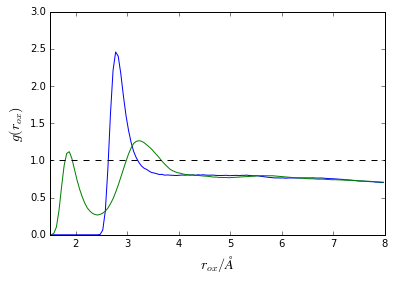

In [156]:
plt.plot(goo[0],goo[1])
plt.plot(goo[0],goh1[1])
plt.plot((0, 8), (1, 1), 'k--')
plt.xlim([1.5,8])
plt.ylim([0,3])
plt.xlabel('$r_{ox} / \AA$', fontsize=14)
plt.ylabel('$g(r_{ox})$', fontsize=14)
plt.show()

Calculate molecule - water rdf

In [143]:
gon     = pt.rdf(traj, solvent_mask=':TIP3@OH2', solute_mask=':DOP@N23', bin_spacing=0.05, maximum=8.)
goh231  = pt.rdf(traj, solvent_mask=':TIP3@OH2', solute_mask=':DOP@H231', bin_spacing=0.05, maximum=8.)
goo1    = pt.rdf(traj, solvent_mask=':TIP3@OH2', solute_mask=':DOP@O1', bin_spacing=0.05, maximum=8.)
goh4    = pt.rdf(traj, solvent_mask=':TIP3@OH2', solute_mask=':DOP@H4', bin_spacing=0.05, maximum=8.)
ghwn23  = pt.rdf(traj, solvent_mask=':TIP3@H1', solute_mask=':DOP@N23', bin_spacing=0.05, maximum=8.)
ghwh231 = pt.rdf(traj, solvent_mask=':TIP3@H1', solute_mask=':DOP@H231', bin_spacing=0.05, maximum=8.)
ghwo1   = pt.rdf(traj, solvent_mask=':TIP3@H1', solute_mask=':DOP@O1', bin_spacing=0.05, maximum=8.)
ghwh4   = pt.rdf(traj, solvent_mask=':TIP3@H1', solute_mask=':DOP@H4', bin_spacing=0.05, maximum=8.)

Plot the g(r) versus r for Ow-x

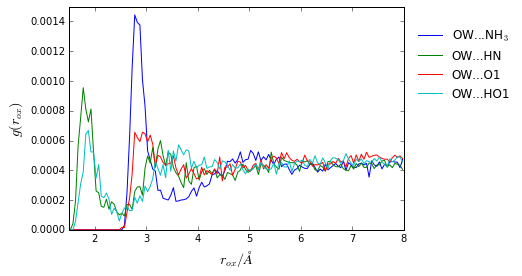

In [144]:
plt.plot(gon[0],gon[1],label='OW...NH$_{3}$')
plt.plot(goh231[0],goh231[1],label='OW...HN')
plt.plot(goo1[0],goo1[1],label='OW...O1')
plt.plot(goh4[0],goh4[1],label='OW...HO1')
plt.plot((0, 8), (1, 1), 'k--')
plt.xlim([1.5,8])
plt.ylim([0,0.0015])
plt.xlabel('$r_{ox} / \AA$', fontsize=14)
plt.ylabel('$g(r_{ox})$', fontsize=14)
plt.legend(loc='upper right',frameon=False, bbox_to_anchor=(1.35, 0.95),numpoints=1)
plt.show()

Plot the g(r) versus r for Hw-x

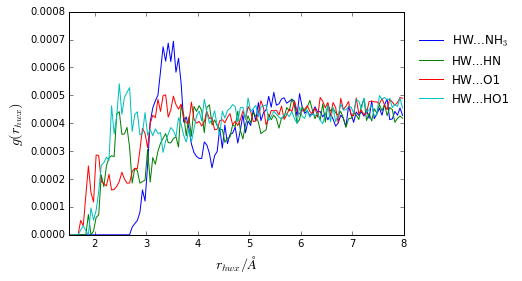

In [151]:
plt.plot(ghwn23[0],ghwn23[1],label='HW...NH$_{3}$')
plt.plot(ghwh231[0],ghwh231[1],label='HW...HN')
plt.plot(ghwo1[0],ghwo1[1],label='HW...O1')
plt.plot(ghwh4[0],ghwh4[1],label='HW...HO1')
plt.plot((0, 8), (1, 1), 'k--')
plt.xlim([1.5,8])
plt.ylim([0,0.0008])
plt.xlabel('$r_{hwx} / \AA$', fontsize=14)
plt.ylabel('$g(r_{hwx})$', fontsize=14)
plt.legend(loc='upper right',frameon=False, bbox_to_anchor=(1.35, 0.95),numpoints=1)
plt.show()

Print the distance between dop (residue 0) and residue 1 (H2O)

In [146]:
data = pt.calc_pairdist(traj, mask=':TIP3@OH2', mask2=':DOP@N23')
print(data[:,0][:1])

[[ 2.55  0.08]]


In [147]:
atom_indices = pt.select(':DOP@N23', traj.top)
print(atom_indices)

[9]


Calculate a dihedral angle as a function of time

In [148]:
dataset = pt.dihedral(traj, ':DOP@N23 :DOP@C2 :DOP@C3 :DOP@C1')

Plot the results

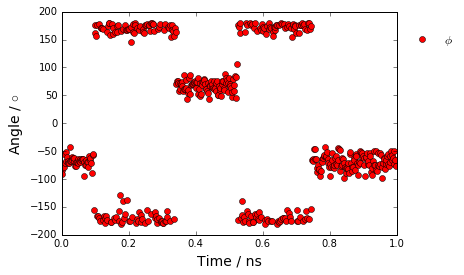

In [149]:
time = [i*0.002 for i in range(len(dataset))]
plt.plot(time,dataset, 'ro', label='$\phi$')
plt.xlabel('Time / ns', fontsize=14)
plt.ylabel('Angle / $\circ$', fontsize=14)
plt.legend(loc='upper right',frameon=False, bbox_to_anchor=(1.2, 0.95),numpoints=1)
plt.show()

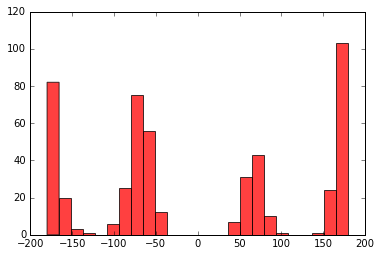

In [150]:
hist0 = plt.hist(dataset,25)
tmp = plt.setp(hist0[2], 'facecolor', 'r', 'alpha', 0.75)